# Machine Learning on Text: Clustering Assignment

In [1]:
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

### Ingest the company_profiles data set into a corpus.

In [2]:
path = 'company_profiles/'
DOC_PATTERN = r'.*\.txt'
corpus = PlaintextCorpusReader(path, DOC_PATTERN)
corpus.fileids()

['A-profile.txt',
 'AA-profile.txt',
 'AAC-profile.txt',
 'AAL-profile.txt',
 'AAMC-profile.txt',
 'AAME-profile.txt',
 'AAN-profile.txt',
 'AAOI-profile.txt',
 'AAON-profile.txt',
 'AAP-profile.txt',
 'AAPL-profile.txt',
 'AAT-profile.txt',
 'AAWW-profile.txt',
 'AB-profile.txt',
 'ABAX-profile.txt',
 'ABBV-profile.txt',
 'ABC-profile.txt',
 'ABCB-profile.txt',
 'ABCD-profile.txt',
 'ABDC-profile.txt',
 'ABEO-profile.txt',
 'ABG-profile.txt',
 'ABIO-profile.txt',
 'ABM-profile.txt',
 'ABMD-profile.txt',
 'ABR-profile.txt',
 'ABT-profile.txt',
 'ABTX-profile.txt',
 'ACAD-profile.txt',
 'ACC-profile.txt',
 'ACCO-profile.txt',
 'ACET-profile.txt',
 'ACFC-profile.txt',
 'ACFN-profile.txt',
 'ACHC-profile.txt',
 'ACHN-profile.txt',
 'ACIA-profile.txt',
 'ACIW-profile.txt',
 'ACLS-profile.txt',
 'ACM-profile.txt',
 'ACNB-profile.txt',
 'ACOR-profile.txt',
 'ACRE-profile.txt',
 'ACRS-profile.txt',
 'ACRX-profile.txt',
 'ACTA-profile.txt',
 'ACTG-profile.txt',
 'ACU-profile.txt',
 'ACUR-profi

### Create a list of documents by extracting the raw text for each fileid in the corpus.

In [3]:
docs = [corpus.raw(fileid) for fileid in corpus.fileids()]
docs[0]

"Agilent Technologies, Inc. provides application focused solutions to the life sciences, diagnostics, and applied chemical markets worldwide. It operates in three segments: Life Sciences and Applied Markets, Diagnostics and Genomics, and Agilent CrossLab. The Life Sciences and Applied Markets segment offers liquid chromatography systems and components; liquid chromatography mass spectrometry systems; gas chromatography systems and components; gas chromatography mass spectrometry systems; inductively coupled plasma mass spectrometry instruments; atomic absorption instruments; microwave plasma-atomic emission spectrometry instruments; inductively coupled plasma optical emission spectrometry instruments; raman spectroscopy; microfluidics based automated electrophoresis products; cell analysis plate based assays; laboratory software and informatics systems; laboratory automation; dissolution testing; vacuum pumps; and measurement technologies. The Diagnostics and Genomics segment provides 

### Preprocess the documents, including the steps below.

- Word tokenize the document.
- Lowercase all tokens.
- Lemmatize and stem the tokens.
- Remove stop words and punctuation.

In [5]:
def preprocess(docs):
    lemmatizer = WordNetLemmatizer()
    stemmer = SnowballStemmer('english')
    preprocessed = []

    for doc in docs:
        tokenized = word_tokenize(doc)
        cleaned = [stemmer.stem(lemmatizer.lemmatize(token.lower())) 
                   for token in tokenized 
                   if token.lower() not in stopwords.words('english')
                  if token.isalpha()]
        untokenized = " ".join(cleaned)
        preprocessed.append(untokenized)
    
    return preprocessed

In [6]:
preprocessed = preprocess(docs)
preprocessed[0]

'agil technolog provid applic focus solut life scienc diagnost appli chemic market worldwid oper three segment life scienc appli market diagnost genom agil crosslab life scienc appli market segment offer liquid chromatographi system compon liquid chromatographi mass spectrometri system gas chromatographi system compon gas chromatographi mass spectrometri system induct coupl plasma mass spectrometri instrument atom absorpt instrument microwav emiss spectrometri instrument induct coupl plasma optic emiss spectrometri instrument raman spectroscopi microfluid base autom electrophoresi product cell analysi plate base assay laboratori softwar informat system laboratori autom dissolut test vacuum pump measur technolog diagnost genom segment provid reagent instrument softwar consum array dna mutat detect genotyp gene copi number determin identif gene rearrang dna methyl profil gene express profil well sequenc target enrich servic equip focus product synthes oligonucleotid use activ pharmaceut 

### TF-IDF vectorize the preprocessed documents.

In [7]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(preprocessed)
vectors

<3558x19471 sparse matrix of type '<class 'numpy.float64'>'
	with 264801 stored elements in Compressed Sparse Row format>

### Determine the optimal number of clusters using the Yellowbrick library's KElbow Visualizer and a KMeans clustering algorithm.

/Users/abilenky/miniconda3/envs/testenv/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<AxesSubplot:>, k=None, metric='silhouette', model=None)

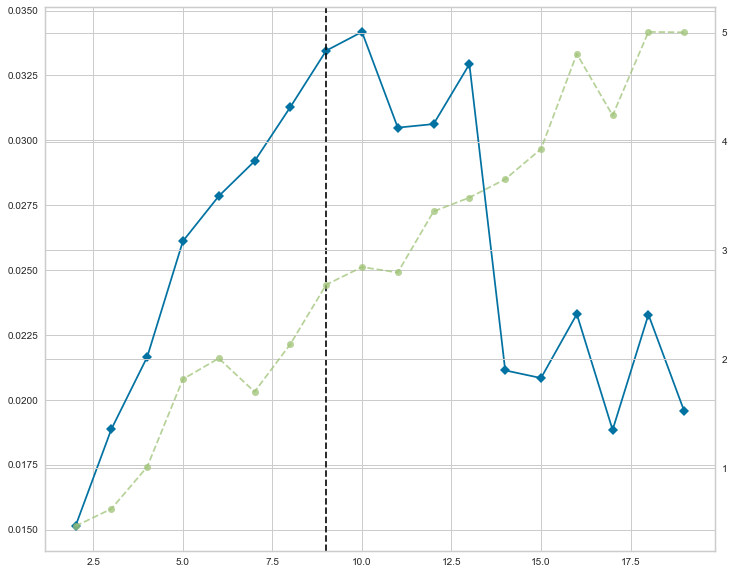

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 10

model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette')

visualizer.fit(vectors)

### Perform K-Means Clustering using the optimal number of clusters determine in the previous step.

In [14]:
kmeans = KMeans(n_clusters=10)

clusters = kmeans.fit_predict(vectors)
clusters

array([9, 7, 7, ..., 7, 7, 2], dtype=int32)

In [17]:
df = pd.DataFrame(docs, columns=['text'])
df.head()

,text
0,"Agilent Technologies, Inc. provides applicatio..."
1,"Alcoa Corporation produces and sells bauxite, ..."
2,"AAC Holdings, Inc. provides inpatient and outp..."
3,"American Airlines Group Inc., through its subs..."
4,"Altisource Asset Management Corporation, an as..."


In [18]:
df['cluster'] = clusters
df.head()

,text,cluster
0,"Agilent Technologies, Inc. provides applicatio...",9
1,"Alcoa Corporation produces and sells bauxite, ...",7
2,"AAC Holdings, Inc. provides inpatient and outp...",7
3,"American Airlines Group Inc., through its subs...",7
4,"Altisource Asset Management Corporation, an as...",1


In [19]:
df['file'] = corpus.fileids()
df.head()

,text,cluster,file
0,"Agilent Technologies, Inc. provides applicatio...",9,A-profile.txt
1,"Alcoa Corporation produces and sells bauxite, ...",7,AA-profile.txt
2,"AAC Holdings, Inc. provides inpatient and outp...",7,AAC-profile.txt
3,"American Airlines Group Inc., through its subs...",7,AAL-profile.txt
4,"Altisource Asset Management Corporation, an as...",1,AAMC-profile.txt


### Perform Agglomerative Clustering using the same number of clusters.

In [21]:
agl = AgglomerativeClustering(n_clusters=10)

clusters = agl.fit_predict(vectors.toarray())

df = pd.DataFrame(docs, columns=['text'])
df['cluster'] = clusters
df['file'] = corpus.fileids()
df.head()

,text,cluster,file
0,"Agilent Technologies, Inc. provides applicatio...",0,A-profile.txt
1,"Alcoa Corporation produces and sells bauxite, ...",8,AA-profile.txt
2,"AAC Holdings, Inc. provides inpatient and outp...",0,AAC-profile.txt
3,"American Airlines Group Inc., through its subs...",8,AAL-profile.txt
4,"Altisource Asset Management Corporation, an as...",3,AAMC-profile.txt


### Choose one of the three topic modeling approaches covered. Cluster into the optimal number of clusters and extract 5 keywords that represent the documents in each cluster.

In [23]:
vectors.shape

(3558, 19471)

In [24]:
from sklearn.decomposition import NMF

num_keywords = 5
num_topics = 8

model = NMF(n_components=num_topics)
model.fit_transform(vectors)

array([[0.        , 0.02563736, 0.0054217 , ..., 0.06454826, 0.00794206,
        0.        ],
       [0.00207656, 0.00851164, 0.01378553, ..., 0.0169716 , 0.0046861 ,
        0.02890252],
       [0.00631064, 0.0497254 , 0.00560913, ..., 0.        , 0.00567756,
        0.00225638],
       ...,
       [0.00371245, 0.01233851, 0.        , ..., 0.02065072, 0.00991275,
        0.03955624],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.16610462],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00178755]])

In [25]:
pd.DataFrame(model.components_, columns=vectorizer.get_feature_names())

,aaa,aac,aad,aaon,aar,aaron,aastrom,aav,ab,abacus,...,zvex,zydeco,zydelig,zydi,zynerba,zynga,zyrtec,zytiga,zyvox,übermonst
0,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.001698,0.000000e+00,0.00000,0.001275,0.000000,0.000000,0.000000,0.000000,0.001373,...,0.000000,0.000000,0.000000,0.000533,0.000000,0.004368,0.000000,0.000000,0.000000,0.000000
2,0.000055,0.000000,5.647529e-05,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000091
3,0.000629,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000373,0.002189,3.691125e-03,0.00000,0.000000,0.000000,0.003315,0.010874,0.016397,0.000000,...,0.003477,0.000000,0.001925,0.000872,0.009309,0.000189,0.000447,0.002587,0.000844,0.000000
5,0.000181,0.000000,0.000000e+00,0.00563,0.002311,0.000000,0.000159,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000462,0.000000,0.000000,0.000096,0.000000,0.000070,0.000000
6,0.000030,0.000000,2.268277e-07,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000014,0.000003,0.000000,0.000000,0.000187,0.000000,0.000235,0.000000
7,0.001134,0.000000,0.000000e+00,0.00229,0.000000,0.012424,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.004682,0.001391,0.000000,0.000744,0.000451


In [26]:
for index, topic in enumerate(model.components_):
    print('topic', index)
    for i in topic.argsort()[:-num_keywords - 1 : -1]:
        print(vectorizer.get_feature_names()[i], topic[i])
        
    print('__________')

topic 0
loan 2.354642825094723
bank 1.5035909288815252
deposit 1.1426717826972677
account 0.9844378148838884
commerci 0.7020730169837971
__________
topic 1
servic 1.3815165040556705
solut 0.7695725339516135
manag 0.6925362310217439
provid 0.5109041113055721
softwar 0.4364658432266501
__________
topic 2
gas 1.1958440223954985
natur 0.925716551147752
oil 0.91441595057107
energi 0.4704743005575228
texa 0.39016454170339426
__________
topic 3
invest 1.4166259540233204
fund 0.9971629348302438
incom 0.5173162021224967
equiti 0.5017848768502304
trust 0.3866868138100412
__________
topic 4
treatment 0.7897484420345757
phase 0.7325853328482963
clinic 0.7239044685282359
trial 0.6613518527655039
develop 0.6066587086436553
__________
topic 5
system 0.828912924584255
product 0.7956041224109264
manufactur 0.6804870811542373
industri 0.6309751928424902
segment 0.5805836163944591
__________
topic 6
insur 1.5401650678135326
life 0.4601280791842173
liabil 0.42162303862313333
properti 0.3965924090942334
pr